In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.utils import shuffle
from keras.optimizers import RMSprop

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle



In [3]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

test_split = 0.1 #portion of data used for testing
 #portion of training data used for validation
    
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Fold #1
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 27)           837         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 27)           108         dense_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 24)           672         batch_normalization_1[0][0]      
____________________________________________________________________________________

227845/227845 [==============================] - 12s 51us/step - loss: 12.2220 - rec_loss: 21.3666 - kl_loss: 2.7245 - val_loss: 12.0540 - val_rec_loss: 21.0509 - val_kl_loss: 2.6977
Epoch 18/150
227845/227845 [==============================] - 11s 50us/step - loss: 12.0673 - rec_loss: 21.0414 - kl_loss: 2.7309 - val_loss: 12.1425 - val_rec_loss: 21.2592 - val_kl_loss: 2.6485
Epoch 19/150
227845/227845 [==============================] - 12s 51us/step - loss: 11.9986 - rec_loss: 20.8887 - kl_loss: 2.7400 - val_loss: 11.9539 - val_rec_loss: 20.8362 - val_kl_loss: 2.6965
Epoch 20/150
227845/227845 [==============================] - 12s 54us/step - loss: 11.9689 - rec_loss: 20.8151 - kl_loss: 2.7488 - val_loss: 12.1698 - val_rec_loss: 21.2494 - val_kl_loss: 2.7072
Epoch 21/150
227845/227845 [==============================] - 12s 53us/step - loss: 11.9064 - rec_loss: 20.6625 - kl_loss: 2.7794 - val_loss: 12.0815 - val_rec_loss: 21.0367 - val_kl_loss: 2.7352
Epoch 22/150
227845/227845 [=====

Epoch 59/150
227845/227845 [==============================] - 13s 57us/step - loss: 11.3736 - rec_loss: 19.2128 - kl_loss: 3.1017 - val_loss: 11.7786 - val_rec_loss: 20.1474 - val_kl_loss: 2.9724
Epoch 60/150
227845/227845 [==============================] - 14s 63us/step - loss: 11.3955 - rec_loss: 19.2583 - kl_loss: 3.0955 - val_loss: 12.0992 - val_rec_loss: 20.9124 - val_kl_loss: 2.8339
Epoch 61/150
227845/227845 [==============================] - 14s 63us/step - loss: 11.3861 - rec_loss: 19.2533 - kl_loss: 3.0833 - val_loss: 12.2231 - val_rec_loss: 20.8233 - val_kl_loss: 3.1726
Epoch 62/150
227845/227845 [==============================] - 14s 59us/step - loss: 11.3645 - rec_loss: 19.1508 - kl_loss: 3.1352 - val_loss: 11.6061 - val_rec_loss: 19.6654 - val_kl_loss: 3.1053
Epoch 63/150
227845/227845 [==============================] - 13s 59us/step - loss: 11.3095 - rec_loss: 19.0663 - kl_loss: 3.1171 - val_loss: 11.6650 - val_rec_loss: 19.8435 - val_kl_loss: 3.0471
Epoch 64/150
227845/

Epoch 101/150
227845/227845 [==============================] - 12s 51us/step - loss: 11.2031 - rec_loss: 18.7625 - kl_loss: 3.1796 - val_loss: 11.6100 - val_rec_loss: 19.7640 - val_kl_loss: 2.9740
Epoch 102/150
227845/227845 [==============================] - 12s 52us/step - loss: 11.2013 - rec_loss: 18.7381 - kl_loss: 3.1926 - val_loss: 11.7814 - val_rec_loss: 19.9220 - val_kl_loss: 3.1501
Epoch 103/150
227845/227845 [==============================] - 12s 52us/step - loss: 11.1827 - rec_loss: 18.7177 - kl_loss: 3.1840 - val_loss: 11.4941 - val_rec_loss: 19.3570 - val_kl_loss: 3.1635
Epoch 104/150
227845/227845 [==============================] - 12s 52us/step - loss: 11.2009 - rec_loss: 18.7659 - kl_loss: 3.1785 - val_loss: 11.5266 - val_rec_loss: 19.5997 - val_kl_loss: 2.9757
Epoch 105/150
227845/227845 [==============================] - 12s 52us/step - loss: 11.1802 - rec_loss: 18.6946 - kl_loss: 3.1920 - val_loss: 11.5528 - val_rec_loss: 19.4284 - val_kl_loss: 3.1623
Epoch 106/150
2

227845/227845 [==============================] - 12s 52us/step - loss: 11.1293 - rec_loss: 18.5788 - kl_loss: 3.1971 - val_loss: 11.3067 - val_rec_loss: 19.0627 - val_kl_loss: 3.0571
Epoch 143/150
227845/227845 [==============================] - 12s 52us/step - loss: 11.1561 - rec_loss: 18.6613 - kl_loss: 3.1669 - val_loss: 11.7523 - val_rec_loss: 19.7995 - val_kl_loss: 3.1978
Epoch 144/150
227845/227845 [==============================] - 12s 52us/step - loss: 11.1258 - rec_loss: 18.5689 - kl_loss: 3.2012 - val_loss: 12.3297 - val_rec_loss: 21.0161 - val_kl_loss: 3.1499
Epoch 145/150
227845/227845 [==============================] - 12s 51us/step - loss: 11.0812 - rec_loss: 18.4639 - kl_loss: 3.2094 - val_loss: 11.3178 - val_rec_loss: 19.0510 - val_kl_loss: 3.0856
Epoch 146/150
227845/227845 [==============================] - 12s 52us/step - loss: 11.0845 - rec_loss: 18.4889 - kl_loss: 3.1869 - val_loss: 11.6298 - val_rec_loss: 19.7488 - val_kl_loss: 3.0275
Epoch 147/150
227845/227845 [

227845/227845 [==============================] - 33s 143us/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0042 - val_accuracy: 0.9992
Epoch 44/50
227845/227845 [==============================] - 33s 144us/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0043 - val_accuracy: 0.9992
Epoch 45/50
227845/227845 [==============================] - 33s 144us/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0042 - val_accuracy: 0.9992
Epoch 46/50
227845/227845 [==============================] - 33s 144us/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0042 - val_accuracy: 0.9992
Epoch 47/50
227845/227845 [==============================] - 33s 144us/step - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.0041 - val_accuracy: 0.9992
Epoch 48/50
227845/227845 [==============================] - 33s 144us/step - loss: 0.0042 - accuracy: 0.9993 - val_loss: 0.0043 - val_accuracy: 0.9992
Epoch 49/50
227845/227845 [==============================] - 33s 144us/step - loss: 0.0043 - accurac

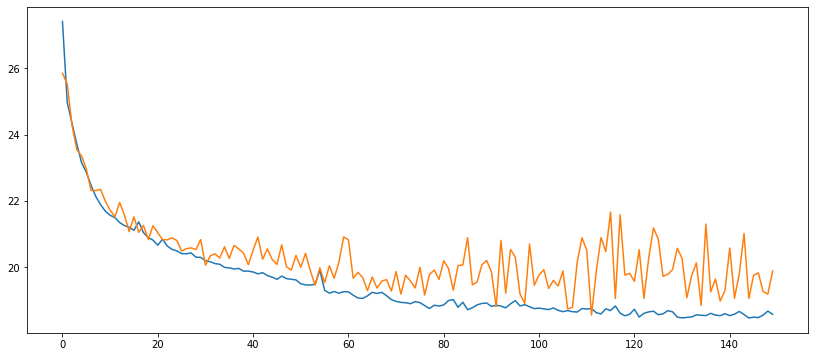

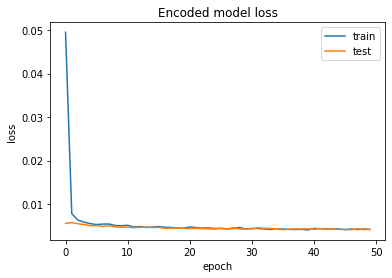

Overall accuracy of Convolutional Neural Network model: 0.9992099996488887


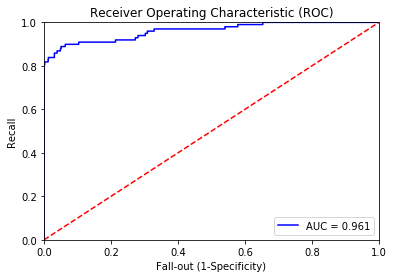

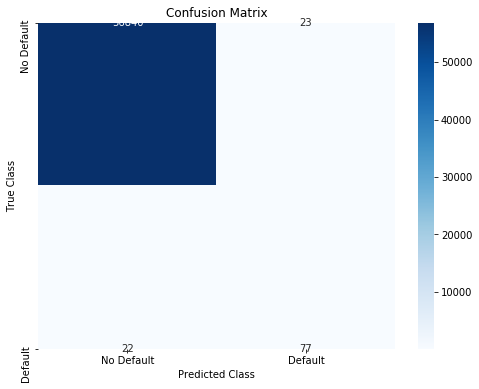

AUC(ROC): 0.8886866484161737
Precision: 0.77
Recall: 0.7777777777777778
F1 score: 0.7738693467336684
False positives: 23
True positives: 77
False negatives: 22
True negatives: 56840
Fold #2
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 27)           837         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 27)           108         dense_10[0][0]                   
__________________________________________________________________________________________________
d

227845/227845 [==============================] - 12s 51us/step - loss: 12.0324 - rec_loss: 21.1112 - kl_loss: 2.5851 - val_loss: 12.1641 - val_rec_loss: 21.4481 - val_kl_loss: 2.4978
Epoch 17/150
227845/227845 [==============================] - 12s 51us/step - loss: 12.0198 - rec_loss: 21.0709 - kl_loss: 2.5929 - val_loss: 12.8556 - val_rec_loss: 22.7410 - val_kl_loss: 2.5629
Epoch 18/150
227845/227845 [==============================] - 12s 51us/step - loss: 11.9745 - rec_loss: 20.9506 - kl_loss: 2.6110 - val_loss: 12.0006 - val_rec_loss: 21.0548 - val_kl_loss: 2.5490
Epoch 19/150
227845/227845 [==============================] - 12s 51us/step - loss: 11.8918 - rec_loss: 20.7826 - kl_loss: 2.6170 - val_loss: 12.5580 - val_rec_loss: 22.1049 - val_kl_loss: 2.6147
Epoch 20/150
227845/227845 [==============================] - 12s 51us/step - loss: 12.0012 - rec_loss: 20.9968 - kl_loss: 2.6247 - val_loss: 12.2124 - val_rec_loss: 21.4881 - val_kl_loss: 2.5634
Epoch 21/150
227845/227845 [=====

Epoch 58/150
227845/227845 [==============================] - 12s 51us/step - loss: 11.3773 - rec_loss: 19.4615 - kl_loss: 2.9137 - val_loss: 13.3111 - val_rec_loss: 23.4470 - val_kl_loss: 2.7965
Epoch 59/150
227845/227845 [==============================] - 12s 51us/step - loss: 11.3672 - rec_loss: 19.4337 - kl_loss: 2.9205 - val_loss: 12.4129 - val_rec_loss: 21.5902 - val_kl_loss: 2.8550
Epoch 60/150
227845/227845 [==============================] - 12s 51us/step - loss: 11.4294 - rec_loss: 19.5707 - kl_loss: 2.9087 - val_loss: 11.9056 - val_rec_loss: 20.4381 - val_kl_loss: 2.9791
Epoch 61/150
227845/227845 [==============================] - 12s 53us/step - loss: 11.4237 - rec_loss: 19.5487 - kl_loss: 2.9075 - val_loss: 11.5973 - val_rec_loss: 19.9997 - val_kl_loss: 2.7991
Epoch 62/150
227845/227845 [==============================] - 12s 52us/step - loss: 11.3771 - rec_loss: 19.4321 - kl_loss: 2.9288 - val_loss: 12.1194 - val_rec_loss: 21.0799 - val_kl_loss: 2.7675
Epoch 63/150
227845/

Epoch 100/150
227845/227845 [==============================] - 12s 52us/step - loss: 11.1851 - rec_loss: 18.9932 - kl_loss: 2.9851 - val_loss: 12.9026 - val_rec_loss: 22.5922 - val_kl_loss: 2.8114
Epoch 101/150
227845/227845 [==============================] - 12s 53us/step - loss: 11.2038 - rec_loss: 19.0177 - kl_loss: 2.9957 - val_loss: 11.7801 - val_rec_loss: 20.2257 - val_kl_loss: 2.9356
Epoch 102/150
227845/227845 [==============================] - 12s 52us/step - loss: 11.3257 - rec_loss: 19.2640 - kl_loss: 2.9903 - val_loss: 11.9620 - val_rec_loss: 20.5630 - val_kl_loss: 2.9578
Epoch 103/150
227845/227845 [==============================] - 12s 52us/step - loss: 11.3032 - rec_loss: 19.2413 - kl_loss: 2.9669 - val_loss: 11.8524 - val_rec_loss: 20.4010 - val_kl_loss: 2.8982
Epoch 104/150
227845/227845 [==============================] - 12s 51us/step - loss: 11.2642 - rec_loss: 19.1420 - kl_loss: 2.9900 - val_loss: 12.9384 - val_rec_loss: 22.5642 - val_kl_loss: 2.9177
Epoch 105/150
2

227845/227845 [==============================] - 12s 51us/step - loss: 11.2285 - rec_loss: 19.0330 - kl_loss: 3.0311 - val_loss: 12.8105 - val_rec_loss: 22.3249 - val_kl_loss: 2.8904
Epoch 142/150
227845/227845 [==============================] - 12s 51us/step - loss: 11.1537 - rec_loss: 18.8937 - kl_loss: 3.0131 - val_loss: 11.8622 - val_rec_loss: 20.3157 - val_kl_loss: 3.0006
Epoch 143/150
227845/227845 [==============================] - 12s 51us/step - loss: 11.1273 - rec_loss: 18.8415 - kl_loss: 3.0247 - val_loss: 11.1568 - val_rec_loss: 18.8718 - val_kl_loss: 3.0486
Epoch 144/150
227845/227845 [==============================] - 12s 51us/step - loss: 11.2737 - rec_loss: 19.1371 - kl_loss: 3.0141 - val_loss: 12.0039 - val_rec_loss: 20.5058 - val_kl_loss: 3.0856
Epoch 145/150
227845/227845 [==============================] - 12s 51us/step - loss: 11.2130 - rec_loss: 18.9971 - kl_loss: 3.0223 - val_loss: 14.9067 - val_rec_loss: 26.4065 - val_kl_loss: 3.0150
Epoch 146/150
227845/227845 [

Epoch 42/50
227845/227845 [==============================] - 34s 151us/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 43/50
227845/227845 [==============================] - 34s 148us/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 44/50
227845/227845 [==============================] - 34s 149us/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 45/50
227845/227845 [==============================] - 34s 148us/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 46/50
227845/227845 [==============================] - 33s 146us/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 47/50
227845/227845 [==============================] - 33s 146us/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 48/50
227845/227845 [==============================] - 33s 146us/step - loss: 0.00

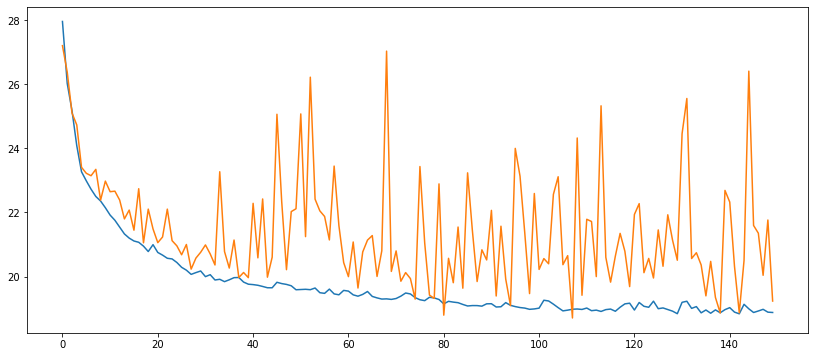

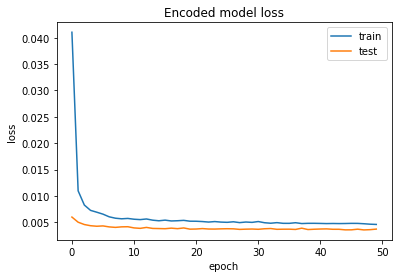

Overall accuracy of Convolutional Neural Network model: 0.9993679997191109


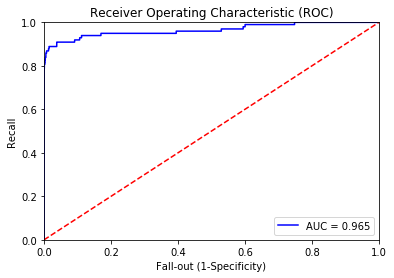

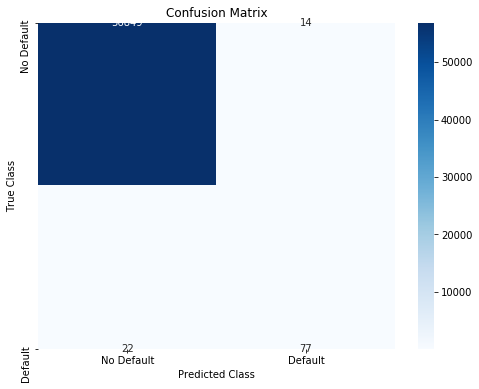

AUC(ROC): 0.8887657859924535
Precision: 0.8461538461538461
Recall: 0.7777777777777778
F1 score: 0.8105263157894737
False positives: 14
True positives: 77
False negatives: 22
True negatives: 56849
Fold #3
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 27)           837         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_23 (BatchNo (None, 27)           108         dense_19[0][0]                   
______________________________________________________________________________________

227846/227846 [==============================] - 12s 54us/step - loss: 12.2603 - rec_loss: 21.6280 - kl_loss: 2.5380 - val_loss: 12.7091 - val_rec_loss: 22.5125 - val_kl_loss: 2.5398
Epoch 17/150
227846/227846 [==============================] - 12s 54us/step - loss: 12.2175 - rec_loss: 21.5322 - kl_loss: 2.5543 - val_loss: 12.4291 - val_rec_loss: 21.8621 - val_kl_loss: 2.6206
Epoch 18/150
227846/227846 [==============================] - 12s 54us/step - loss: 12.1880 - rec_loss: 21.4537 - kl_loss: 2.5777 - val_loss: 12.4606 - val_rec_loss: 22.0534 - val_kl_loss: 2.5123
Epoch 19/150
227846/227846 [==============================] - 12s 53us/step - loss: 12.1568 - rec_loss: 21.3696 - kl_loss: 2.5985 - val_loss: 12.2504 - val_rec_loss: 21.6112 - val_kl_loss: 2.5203
Epoch 20/150
227846/227846 [==============================] - 12s 54us/step - loss: 12.1287 - rec_loss: 21.2970 - kl_loss: 2.6148 - val_loss: 12.3068 - val_rec_loss: 21.7240 - val_kl_loss: 2.5509
Epoch 21/150
227846/227846 [=====

Epoch 58/150
227846/227846 [==============================] - 12s 54us/step - loss: 11.3675 - rec_loss: 19.3229 - kl_loss: 2.9962 - val_loss: 11.3220 - val_rec_loss: 19.2826 - val_kl_loss: 2.9417
Epoch 59/150
227846/227846 [==============================] - 12s 54us/step - loss: 11.3491 - rec_loss: 19.2801 - kl_loss: 3.0076 - val_loss: 11.4478 - val_rec_loss: 19.6400 - val_kl_loss: 2.8470
Epoch 60/150
227846/227846 [==============================] - 12s 54us/step - loss: 11.3235 - rec_loss: 19.2132 - kl_loss: 3.0197 - val_loss: 11.4583 - val_rec_loss: 19.5837 - val_kl_loss: 2.9126
Epoch 61/150
227846/227846 [==============================] - 12s 55us/step - loss: 11.3104 - rec_loss: 19.1853 - kl_loss: 3.0251 - val_loss: 11.4440 - val_rec_loss: 19.4409 - val_kl_loss: 3.0230
Epoch 62/150
227846/227846 [==============================] - 12s 55us/step - loss: 11.2804 - rec_loss: 19.0867 - kl_loss: 3.0444 - val_loss: 11.4105 - val_rec_loss: 19.4571 - val_kl_loss: 2.9352
Epoch 63/150
227846/

Epoch 100/150
227846/227846 [==============================] - 12s 55us/step - loss: 11.1330 - rec_loss: 18.6983 - kl_loss: 3.0854 - val_loss: 11.2913 - val_rec_loss: 19.1646 - val_kl_loss: 2.9150
Epoch 101/150
227846/227846 [==============================] - 12s 55us/step - loss: 11.1364 - rec_loss: 18.7145 - kl_loss: 3.0787 - val_loss: 11.1436 - val_rec_loss: 18.7991 - val_kl_loss: 2.9923
Epoch 102/150
227846/227846 [==============================] - 12s 54us/step - loss: 11.1225 - rec_loss: 18.6867 - kl_loss: 3.0781 - val_loss: 11.2093 - val_rec_loss: 18.9714 - val_kl_loss: 2.9810
Epoch 103/150
227846/227846 [==============================] - 13s 55us/step - loss: 11.0670 - rec_loss: 18.5684 - kl_loss: 3.1045 - val_loss: 11.3019 - val_rec_loss: 19.0915 - val_kl_loss: 3.0398
Epoch 104/150
227846/227846 [==============================] - 12s 54us/step - loss: 11.0890 - rec_loss: 18.6069 - kl_loss: 3.1027 - val_loss: 11.2564 - val_rec_loss: 18.9926 - val_kl_loss: 3.0344
Epoch 105/150
2

227846/227846 [==============================] - 12s 54us/step - loss: 11.0325 - rec_loss: 18.4326 - kl_loss: 3.1300 - val_loss: 11.0895 - val_rec_loss: 18.6286 - val_kl_loss: 3.0408
Epoch 142/150
227846/227846 [==============================] - 12s 54us/step - loss: 11.0362 - rec_loss: 18.4532 - kl_loss: 3.1114 - val_loss: 11.0446 - val_rec_loss: 18.5575 - val_kl_loss: 3.0395
Epoch 143/150
227846/227846 [==============================] - 12s 54us/step - loss: 11.0382 - rec_loss: 18.4594 - kl_loss: 3.1180 - val_loss: 11.2605 - val_rec_loss: 18.9249 - val_kl_loss: 3.0934
Epoch 144/150
227846/227846 [==============================] - 12s 54us/step - loss: 11.0123 - rec_loss: 18.3988 - kl_loss: 3.1207 - val_loss: 11.0446 - val_rec_loss: 18.6140 - val_kl_loss: 2.9575
Epoch 145/150
227846/227846 [==============================] - 12s 54us/step - loss: 11.0473 - rec_loss: 18.4739 - kl_loss: 3.1123 - val_loss: 11.2122 - val_rec_loss: 18.8991 - val_kl_loss: 3.0128
Epoch 146/150
227846/227846 [

227846/227846 [==============================] - 36s 157us/step - loss: 0.0046 - accuracy: 0.9992 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 42/50
227846/227846 [==============================] - 36s 157us/step - loss: 0.0044 - accuracy: 0.9992 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 43/50
227846/227846 [==============================] - 36s 157us/step - loss: 0.0046 - accuracy: 0.9992 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 44/50
227846/227846 [==============================] - 36s 159us/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 45/50
227846/227846 [==============================] - 36s 158us/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 46/50
227846/227846 [==============================] - 36s 157us/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 47/50
227846/227846 [==============================] - 36s 158us/step - loss: 0.0046 - accurac

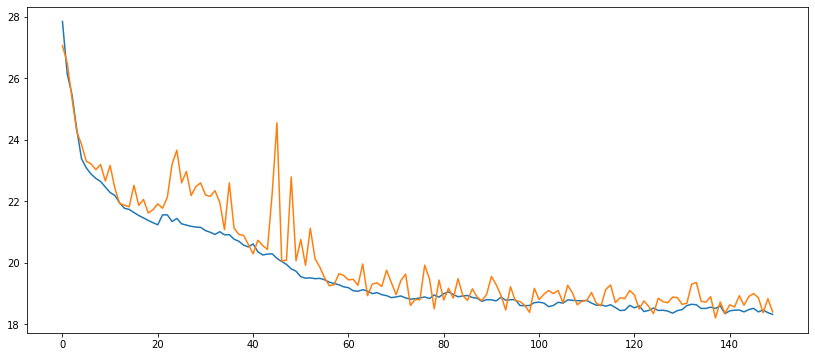

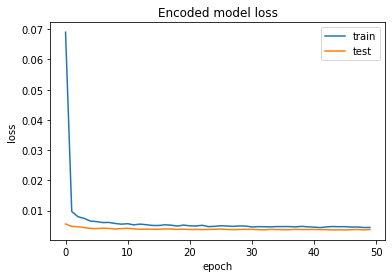

Overall accuracy of Convolutional Neural Network model: 0.999420656238479


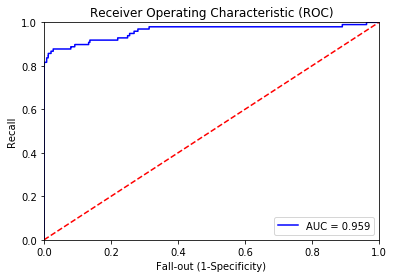

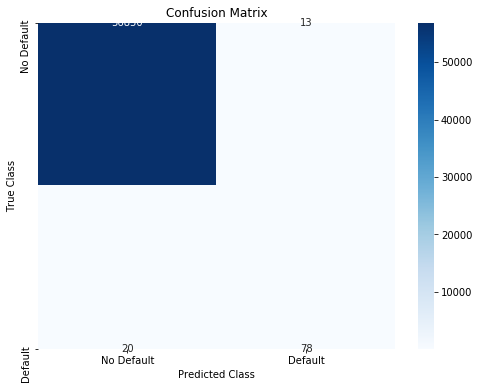

AUC(ROC): 0.8978448738410651
Precision: 0.8571428571428571
Recall: 0.7959183673469388
F1 score: 0.8253968253968254
False positives: 13
True positives: 78
False negatives: 20
True negatives: 56850
Fold #4
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 27)           837         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_34 (BatchNo (None, 27)           108         dense_28[0][0]                   
______________________________________________________________________________________

227846/227846 [==============================] - 12s 53us/step - loss: 12.0784 - rec_loss: 20.9068 - kl_loss: 2.8224 - val_loss: 12.4352 - val_rec_loss: 21.6815 - val_kl_loss: 2.7535
Epoch 17/150
227846/227846 [==============================] - 12s 53us/step - loss: 12.0105 - rec_loss: 20.7599 - kl_loss: 2.8392 - val_loss: 12.2914 - val_rec_loss: 21.3559 - val_kl_loss: 2.8151
Epoch 18/150
227846/227846 [==============================] - 12s 53us/step - loss: 11.9715 - rec_loss: 20.6746 - kl_loss: 2.8545 - val_loss: 12.1404 - val_rec_loss: 21.0322 - val_kl_loss: 2.8210
Epoch 19/150
227846/227846 [==============================] - 12s 53us/step - loss: 11.9552 - rec_loss: 20.6347 - kl_loss: 2.8603 - val_loss: 12.2528 - val_rec_loss: 21.3400 - val_kl_loss: 2.7432
Epoch 20/150
227846/227846 [==============================] - 12s 54us/step - loss: 11.9527 - rec_loss: 20.6168 - kl_loss: 2.8769 - val_loss: 11.8868 - val_rec_loss: 20.5198 - val_kl_loss: 2.8445
Epoch 21/150
227846/227846 [=====

Epoch 58/150
227846/227846 [==============================] - 12s 55us/step - loss: 11.6289 - rec_loss: 19.6472 - kl_loss: 3.1319 - val_loss: 12.3201 - val_rec_loss: 21.1120 - val_kl_loss: 3.0473
Epoch 59/150
227846/227846 [==============================] - 12s 54us/step - loss: 11.5530 - rec_loss: 19.4986 - kl_loss: 3.1317 - val_loss: 13.1219 - val_rec_loss: 22.6442 - val_kl_loss: 3.1069
Epoch 60/150
227846/227846 [==============================] - 12s 55us/step - loss: 11.5800 - rec_loss: 19.5363 - kl_loss: 3.1399 - val_loss: 12.9839 - val_rec_loss: 22.3894 - val_kl_loss: 3.0860
Epoch 61/150
227846/227846 [==============================] - 12s 53us/step - loss: 11.5675 - rec_loss: 19.5231 - kl_loss: 3.1296 - val_loss: 12.8869 - val_rec_loss: 22.1721 - val_kl_loss: 3.1080
Epoch 62/150
227846/227846 [==============================] - 12s 53us/step - loss: 11.5437 - rec_loss: 19.4873 - kl_loss: 3.1232 - val_loss: 12.7109 - val_rec_loss: 21.9038 - val_kl_loss: 3.0336
Epoch 63/150
227846/

Epoch 100/150
227846/227846 [==============================] - 12s 53us/step - loss: 11.4850 - rec_loss: 19.2672 - kl_loss: 3.1429 - val_loss: 12.6953 - val_rec_loss: 21.7483 - val_kl_loss: 3.0801
Epoch 101/150
227846/227846 [==============================] - 12s 53us/step - loss: 11.6571 - rec_loss: 19.6180 - kl_loss: 3.1372 - val_loss: 11.9704 - val_rec_loss: 20.3754 - val_kl_loss: 2.9951
Epoch 102/150
227846/227846 [==============================] - 12s 54us/step - loss: 11.6128 - rec_loss: 19.5213 - kl_loss: 3.1468 - val_loss: 13.0404 - val_rec_loss: 22.4432 - val_kl_loss: 3.0774
Epoch 103/150
227846/227846 [==============================] - 12s 53us/step - loss: 11.7159 - rec_loss: 19.7493 - kl_loss: 3.1262 - val_loss: 12.2194 - val_rec_loss: 20.8284 - val_kl_loss: 3.0521
Epoch 104/150
227846/227846 [==============================] - 12s 53us/step - loss: 11.5000 - rec_loss: 19.2844 - kl_loss: 3.1675 - val_loss: 11.7138 - val_rec_loss: 19.6340 - val_kl_loss: 3.2438
Epoch 105/150
2

227846/227846 [==============================] - 12s 53us/step - loss: 11.5085 - rec_loss: 19.1111 - kl_loss: 3.2857 - val_loss: 11.6962 - val_rec_loss: 19.5731 - val_kl_loss: 3.2183
Epoch 142/150
227846/227846 [==============================] - 12s 53us/step - loss: 11.4820 - rec_loss: 19.0292 - kl_loss: 3.3153 - val_loss: 11.6523 - val_rec_loss: 19.4046 - val_kl_loss: 3.2569
Epoch 143/150
227846/227846 [==============================] - 12s 54us/step - loss: 11.4508 - rec_loss: 18.9480 - kl_loss: 3.3259 - val_loss: 11.4926 - val_rec_loss: 19.1148 - val_kl_loss: 3.2437
Epoch 144/150
227846/227846 [==============================] - 13s 57us/step - loss: 11.5786 - rec_loss: 19.2542 - kl_loss: 3.2662 - val_loss: 12.1519 - val_rec_loss: 20.3906 - val_kl_loss: 3.2706
Epoch 145/150
227846/227846 [==============================] - 13s 57us/step - loss: 11.5902 - rec_loss: 19.2666 - kl_loss: 3.2755 - val_loss: 11.6201 - val_rec_loss: 19.2914 - val_kl_loss: 3.3239
Epoch 146/150
227846/227846 [

Epoch 42/50
227846/227846 [==============================] - 35s 153us/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 43/50
227846/227846 [==============================] - 35s 153us/step - loss: 0.0047 - accuracy: 0.9991 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 44/50
227846/227846 [==============================] - 35s 153us/step - loss: 0.0046 - accuracy: 0.9992 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 45/50
227846/227846 [==============================] - 35s 153us/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 46/50
227846/227846 [==============================] - 35s 153us/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0043 - val_accuracy: 0.9993
Epoch 47/50
227846/227846 [==============================] - 35s 153us/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 48/50
227846/227846 [==============================] - 35s 153us/step - loss: 0.00

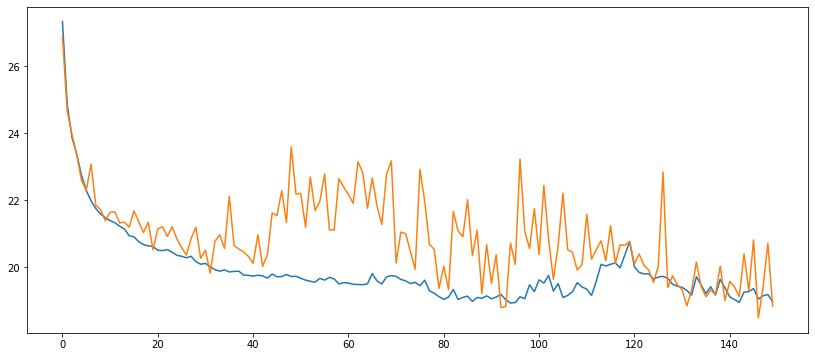

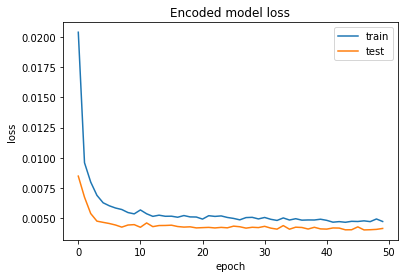

Overall accuracy of Convolutional Neural Network model: 0.9992977651375503


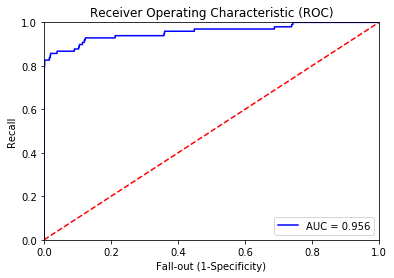

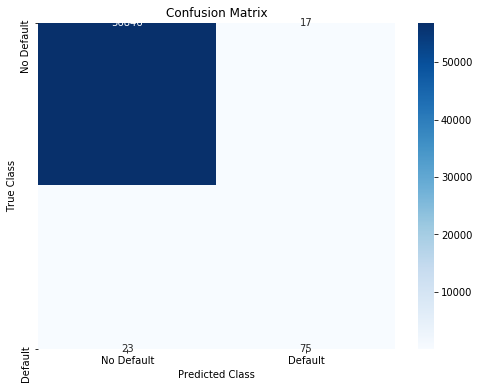

AUC(ROC): 0.8825035791359612
Precision: 0.8152173913043478
Recall: 0.7653061224489796
F1 score: 0.7894736842105263
False positives: 17
True positives: 75
False negatives: 23
True negatives: 56846
Fold #5
Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_37 (Dense)                (None, 27)           837         input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_45 (BatchNo (None, 27)           108         dense_37[0][0]                   
______________________________________________________________________________________

227846/227846 [==============================] - 12s 51us/step - loss: 12.4088 - rec_loss: 21.6657 - kl_loss: 2.7675 - val_loss: 12.4749 - val_rec_loss: 21.8300 - val_kl_loss: 2.7145
Epoch 17/150
227846/227846 [==============================] - 12s 51us/step - loss: 12.3834 - rec_loss: 21.6164 - kl_loss: 2.7607 - val_loss: 12.2744 - val_rec_loss: 21.3142 - val_kl_loss: 2.8374
Epoch 18/150
227846/227846 [==============================] - 12s 51us/step - loss: 12.3448 - rec_loss: 21.5357 - kl_loss: 2.7660 - val_loss: 12.4433 - val_rec_loss: 21.7211 - val_kl_loss: 2.7751
Epoch 19/150
227846/227846 [==============================] - 12s 51us/step - loss: 12.2775 - rec_loss: 21.4111 - kl_loss: 2.7624 - val_loss: 12.2768 - val_rec_loss: 21.4699 - val_kl_loss: 2.7036
Epoch 20/150
227846/227846 [==============================] - 12s 51us/step - loss: 12.2987 - rec_loss: 21.4511 - kl_loss: 2.7661 - val_loss: 12.3451 - val_rec_loss: 21.3954 - val_kl_loss: 2.8929
Epoch 21/150
227846/227846 [=====

Epoch 58/150
227846/227846 [==============================] - 12s 51us/step - loss: 11.7863 - rec_loss: 20.3145 - kl_loss: 2.8499 - val_loss: 15.2916 - val_rec_loss: 27.3692 - val_kl_loss: 2.8000
Epoch 59/150
227846/227846 [==============================] - 12s 51us/step - loss: 11.8024 - rec_loss: 20.3518 - kl_loss: 2.8416 - val_loss: 13.7555 - val_rec_loss: 24.2614 - val_kl_loss: 2.8194
Epoch 60/150
227846/227846 [==============================] - 12s 51us/step - loss: 11.7915 - rec_loss: 20.3365 - kl_loss: 2.8400 - val_loss: 14.1794 - val_rec_loss: 25.1708 - val_kl_loss: 2.7776
Epoch 61/150
227846/227846 [==============================] - 12s 51us/step - loss: 11.8453 - rec_loss: 20.4542 - kl_loss: 2.8370 - val_loss: 12.1084 - val_rec_loss: 21.0374 - val_kl_loss: 2.7671
Epoch 62/150
227846/227846 [==============================] - 12s 51us/step - loss: 11.8052 - rec_loss: 20.3691 - kl_loss: 2.8334 - val_loss: 13.0360 - val_rec_loss: 22.8228 - val_kl_loss: 2.8260
Epoch 63/150
227846/

Epoch 100/150
227846/227846 [==============================] - 12s 53us/step - loss: 11.6034 - rec_loss: 19.9049 - kl_loss: 2.8994 - val_loss: 11.6552 - val_rec_loss: 20.1235 - val_kl_loss: 2.7755
Epoch 101/150
227846/227846 [==============================] - 12s 52us/step - loss: 11.5916 - rec_loss: 19.8868 - kl_loss: 2.8912 - val_loss: 11.7268 - val_rec_loss: 20.1308 - val_kl_loss: 2.8990
Epoch 102/150
227846/227846 [==============================] - 12s 51us/step - loss: 11.5765 - rec_loss: 19.8289 - kl_loss: 2.9144 - val_loss: 11.7431 - val_rec_loss: 20.2069 - val_kl_loss: 2.8653
Epoch 103/150
227846/227846 [==============================] - 12s 52us/step - loss: 11.6022 - rec_loss: 19.8757 - kl_loss: 2.9148 - val_loss: 11.5100 - val_rec_loss: 19.6458 - val_kl_loss: 2.9318
Epoch 104/150
227846/227846 [==============================] - 12s 51us/step - loss: 11.5063 - rec_loss: 19.6475 - kl_loss: 2.9366 - val_loss: 11.5264 - val_rec_loss: 19.7634 - val_kl_loss: 2.8435
Epoch 105/150
2

227846/227846 [==============================] - 13s 56us/step - loss: 11.2293 - rec_loss: 19.0039 - kl_loss: 3.0065 - val_loss: 12.6650 - val_rec_loss: 21.8191 - val_kl_loss: 3.0525
Epoch 142/150
227846/227846 [==============================] - 12s 54us/step - loss: 11.2139 - rec_loss: 18.9878 - kl_loss: 3.0012 - val_loss: 11.9515 - val_rec_loss: 20.4588 - val_kl_loss: 2.9781
Epoch 143/150
227846/227846 [==============================] - 12s 53us/step - loss: 11.2059 - rec_loss: 18.9540 - kl_loss: 3.0070 - val_loss: 11.9432 - val_rec_loss: 20.4879 - val_kl_loss: 2.9418
Epoch 144/150
227846/227846 [==============================] - 12s 54us/step - loss: 11.2596 - rec_loss: 19.0536 - kl_loss: 3.0083 - val_loss: 11.7793 - val_rec_loss: 20.1983 - val_kl_loss: 2.8912
Epoch 145/150
227846/227846 [==============================] - 12s 52us/step - loss: 11.2393 - rec_loss: 19.0066 - kl_loss: 3.0097 - val_loss: 13.0066 - val_rec_loss: 22.5702 - val_kl_loss: 2.9593
Epoch 146/150
227846/227846 [

Epoch 42/50
227846/227846 [==============================] - 34s 148us/step - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 43/50
227846/227846 [==============================] - 34s 148us/step - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 44/50
227846/227846 [==============================] - 34s 147us/step - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 45/50
227846/227846 [==============================] - 35s 152us/step - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 46/50
227846/227846 [==============================] - 35s 154us/step - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 47/50
227846/227846 [==============================] - 35s 154us/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 48/50
227846/227846 [==============================] - 35s 154us/step - loss: 0.00

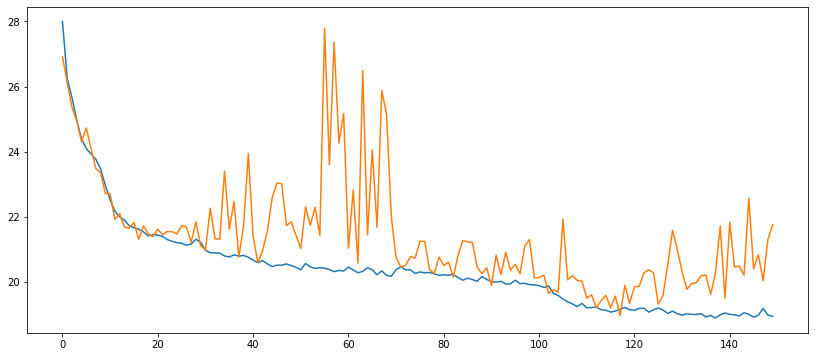

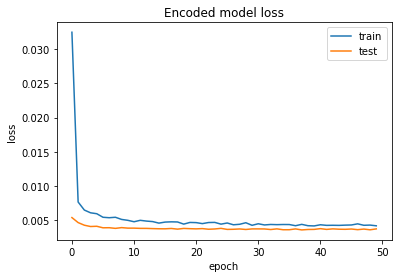

Overall accuracy of Convolutional Neural Network model: 0.999350432752234


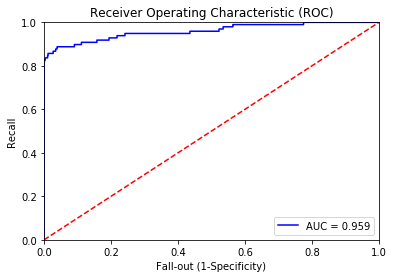

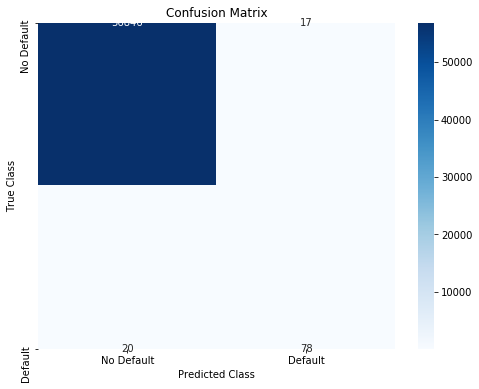

AUC(ROC): 0.8978097015849409
Precision: 0.8210526315789474
Recall: 0.7959183673469388
F1 score: 0.8082901554404144
False positives: 17
True positives: 78
False negatives: 20
True negatives: 56846


TypeError: can only concatenate str (not "numpy.float64") to str

In [7]:
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
#encoding_dim_4 = 20
#encoding_dim_5 = 18
hidden_dim = 10 #size of the hidden layer in encoder and decoder
latent_dim = 2 #number of latent variables to learn
learning_rate = 1e-3

#Cross_Validate

kf = StratifiedKFold(5, shuffle = True, random_state=42) # Use for Kfold Validation

tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)
    

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]

    
    scaler = preprocessing.StandardScaler()

    x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test) 
    
    
    #print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    #print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    #sm = SMOTE(random_state=2)
    #X_res_train, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    #print('After OverSampling, the shape of train_X: {}'.format(X_res_train.shape))
    #print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    #print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    #print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    

    input_dim = x_train.shape[1]
    x = input_dim

    input_layer = Input(shape=(input_dim,))

    encoder = Dense(encoding_dim_1, activation='tanh',activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_2, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_3, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_4, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_5, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    encoder = Dense(hidden_dim, activation='tanh' , name='encoder_hidden')(encoder)
    encoder = BatchNormalization()(encoder)

    z_mean = Dense(latent_dim, name='z_mean')(encoder)
    z_log_var = Dense(latent_dim, name='z_log_var')(encoder)
    
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=K.shape(z_mean), mean=0., stddev=1.)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    z = Lambda(sampling, name='z_sampled')([z_mean, z_log_var])
    t = BatchNormalization()(z)

    decoder1 = Dense(hidden_dim, activation='tanh')(t)
    decoder1 = BatchNormalization()(decoder1) 

    #decoder = Dense(encoding_dim_5, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    #decoder = Dense(encoding_dim_4, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_3, activation='tanh')(decoder1)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_2, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_1, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)


    decoded_mean = Dense(input_dim, activation=None, name='decoded_mean')(decoder)


    vae = Model(inputs=input_layer, outputs=decoded_mean)
    
    def rec_loss(y_true, y_pred):
        return K.sum(K.square(y_true - y_pred), axis=-1)

    def kl_loss(y_true, y_pred):
        return - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)

    def vae_loss(x, decoded_mean):
        rec_loss = K.sum(K.square(x - decoded_mean), axis=-1)
        kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean((rec_loss + kl_loss) / 2)

    vae.compile(optimizer=RMSprop(lr=learning_rate), loss=vae_loss, metrics=[rec_loss, kl_loss])
    vae.summary()
    
    n_epochs = 150
    batch_size = 128

#early_stopping = EarlyStopping(monitor='loss', patience=10, min_delta=1e-5) #stop training if loss does not decrease with at least 0.00001
#reduce_lr = ReduceLROnPlateau(monitor='loss', patience=5, min_delta=1e-5, factor=0.2) #reduce learning rate (divide it by 5 = multiply it by 0.2) if loss does not decrease with at least 0.00001

#callbacks = [reduce_lr]

#collect training data in history object
    history = vae.fit(x_train, x_train, 
                  validation_data=(x_test, x_test),
                  batch_size=batch_size,
                  shuffle = True,
                  epochs=n_epochs,
                  )
    
    
    fig = plt.figure(figsize=(14, 6))
    ax = fig.gca()
    ax.plot(history.history['rec_loss']);
    ax.plot(history.history['val_rec_loss']);
    
    
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, decoder1)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(x_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape
    
    #--------------------------------Build new model using encoded data--------------------------

    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train, epochs=50,validation_data=(encoded_test_x, y_test), verbose=1)

    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    

        #---------------------------------Predictions and visuallizations-----------------------#Predict on test set
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()


    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    

    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)
    

      

In [12]:

print("Average tn = " + str(Average(tn_summary)))
print("Average fp = " + str(Average(fp_summary)))
print("Average fn = "+ str(Average(fn_summary)))    
print("Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print("Average Precision = " + str(Average_precision))

print("Average Recall = " + str(Average_recall))

print("Average F1 score = " + str(Average_f1_score))

Average tn = 56846.2
Average fp = 16.8
Average fn = 21.4
Average tp = 77.0
Average Precision = 0.8208955223880597
Average Recall = 0.782520325203252
Average F1 score = 0.801248699271592


In [15]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print("Total fp: " + str(total_fp))
print(" Total fn:" + str(total_fn))
print(" Total tp:" + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print("Total Precision = " + str(Total_Precision))
print("Total Recall = " + str(Total_Recall))
print("Total F1_score = " + str(Total_F1_score))
    


 Total tn: 284231
Total fp: 84
 Total fn:107
 Total tp:385
Total Precision = 0.8208955223880597
Total Recall = 0.782520325203252
Total F1_score = 0.801248699271592
